
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">


# <center> **Nodule classification challenge!** </center>


In [ ]:
#@title Insert your credentials
course_id = 'IA2-20221-J1' #@param {type:"string"}
student_id = '2218109' #@param {type:"string"}
assignment_id = f'{course_id}.nodules_classification_challenge'

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell
from IPython.display import clear_output

!pip install azure-storage-blob -qqq
!pip install --upgrade gdown -qqq
clear_output()

import numpy as np
from google.colab import files
from collections import namedtuple
from configparser import ConfigParser
from azure.storage.blob import ContainerClient

import os
import requests

u = "https://drive.google.com/uc?id="
id = "11eL_0sH8Vqlc7bsw0sTWMgV49hrZYkSS"
Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def serialize_predictions(predictions: np.ndarray, assignment_id: str, student_id: str):
    assert predictions.shape == (750,), "`predictions` shape should be equal to (750,)"
    assert np.array_equal(predictions, predictions.astype(bool)), "`predictions` array should be binary."
    dest_dir = "nodules_classification_test_labels"
    func_name = "nodules_classification_challenge"
    assignment_id = assignment_id.replace(".", "+")
    preds_save_path = f"{dest_dir} {assignment_id} {student_id} {func_name}.npy"
    np.save(preds_save_path, predictions.astype(np.float32))
    return preds_save_path


def upload_file_to_blob(filepath: str, connection_string: str, container_name: str):
    %cd /content/
    clear_output()
    container_client = ContainerClient.from_connection_string(connection_string, container_name)
    blob_client = container_client.get_blob_client(filepath)
    with open(filepath, mode="rb") as data:
        print(f"Uploading predictions...")
        blob_client.upload_blob(data, overwrite=True)
        print(f"Successfully uploaded {os.path.basename(filepath)} predictions.")
    

def submit_nodules_predictions(predictions: np.ndarray, assignment_id: str, student_id: str):
    
    parser = ConfigParser()
    r = requests.get(u+id).content.decode('utf-8')

    c = {}
    parser.read_string(r)
    params = parser.items("s")
    for param in params: c[param[0]] = param[1]
    
    preds_save_path = serialize_predictions(predictions, assignment_id, student_id)
    upload_file_to_blob(preds_save_path, c['cs'], c['cn'])

def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

# Challenge

In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
# os.chdir('//content/drive/My Drive/Master/Contraprestación/')
print(os.getcwd())

Mounted at /content/drive
/content


In [ ]:
#@title Load libraries and remember to configurate notebook in GPU

import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import base64
from glob import glob

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

# Challenge

## Predict on test samples

In [ ]:
#@title Download the test samples
!gdown https://drive.google.com/uc?id=1PRQBBMr_u-rAA3A3x7Q8iAlPDUk1Gh98

Downloading...
From: https://drive.google.com/uc?id=1PRQBBMr_u-rAA3A3x7Q8iAlPDUk1Gh98
To: /content/nodules_classification_test_data.npy
100% 197M/197M [00:01<00:00, 124MB/s]


### Load the test samples

Load the test data and explore properties related to shape and intensity

In [ ]:
X_test_path = "/content/nodules_classification_test_data.npy"
X_test = np.load(X_test_path)

print(f"X_test shape -> {X_test.shape}")
print(f"X_test -> min: {X_test.min()}, max: {X_test.max()}")

X_test shape -> (750, 512, 512)
X_test -> min: 0, max: 255


### Load the trained network

Load the network you trained on the last class.

In [ ]:
model_path = ...
model = tf.keras.models.load_model(model_path)

### Predict using the trained network

In [ ]:
probs_test = model.predict(...)

### Binarize the predictions

Deep learning models typically output probabilities, make sure to convert these into binary predictions. If your model has only one neuron, compare each one of the probabilities to your threshold to produce binary numbers. Contrary, if you happened to use a model that outputs one-hot encoded predictions, use the `np.argmax` method on the last axis to get the index of the neuron with the highest probability.

In [ ]:
preds_test = (probs_test > 0.5).astype(np.float32) # one neuron.
# preds_test = np.argmax(probs_test, axis=-1) # two neurons.

## Submit your results

**❗IMPORTANT**: You should submit a numpy array with the **binarized predictions**. The predictions should have a shape of $(750,)$, i.e. `preds_test.shape == (750,)`. Otherwise, the evaluation will not happen.

In [ ]:
submit_nodules_predictions(preds_test, assignment_id, student_id)

Uploading predictions...
Successfully uploaded ACDCHeartSegmentation_ytest IA2-20221-J1+acdc_segmentation_challenge 2218109 acdc_segmentation_challenge.npy predictions.


# Send the notebook and predictions via email

In [ ]:
#@title Save the notebook changes
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title Download your predictions
#@markdown Do not change the file name❗
%cd /content/
clear_output()

content = os.listdir("/content/")
preds_path = [p for p in content if student_id in p][0]
files.download(preds_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Send the email

Add your code as a prefix in the notebook name and follow `Archivo (File) > Descargar (Download) > Descargar .ipynb (Download .ipynb)`. You'll have your notebook and predictions ready to attach as an email to famarcar@saber.uis.edu.co. Best of luck!

**IMPORTANT:** Make sure the score appears on the notebook before sending it.

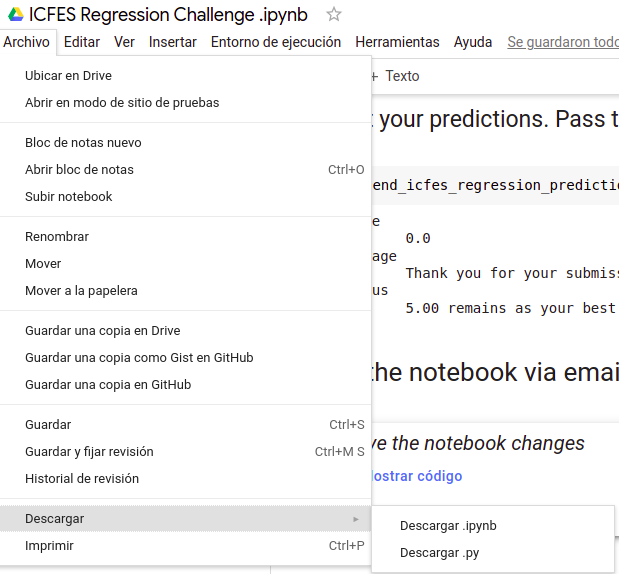

# Good luck!

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">